# Import the liberary

In [81]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### load the processed data

In [82]:
data = pd.read_csv(r"F:\working project\Flight_Fare_Prediction\data\processed\processed_data.csv")

In [83]:
data.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   journey_Date                       10682 non-null  int64
 3   journey_Month                      10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_min                            10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_min                        10682 non-null  int64
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air Asia                           10682 non-null  bool 
 11  Air India                          10682 non-null  bool 
 12  GoAir             

In [85]:
data.isna().sum()

Total_Stops                          0
Price                                0
journey_Date                         0
journey_Month                        0
Dep_hour                             0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Duration_hours                       0
Duration_mins                        0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                   

In [86]:
# Convert boolean columns to object type
boolean_columns = data.select_dtypes(include=[bool]).columns.tolist()
data[boolean_columns] = data[boolean_columns].astype(object)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   journey_Date                       10682 non-null  int64 
 3   journey_Month                      10682 non-null  int64 
 4   Dep_hour                           10682 non-null  int64 
 5   Dep_min                            10682 non-null  int64 
 6   Arrival_hour                       10682 non-null  int64 
 7   Arrival_min                        10682 non-null  int64 
 8   Duration_hours                     10682 non-null  int64 
 9   Duration_mins                      10682 non-null  int64 
 10  Air Asia                           10682 non-null  object
 11  Air India                          10682 non-null  object
 12  GoAi

In [88]:
# Features and target
X = data.drop('Price', axis=1)
y = data['Price']

In [89]:

# Dynamically select numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [52]:
# Preprocessing pipelines for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [53]:
# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [54]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Total_Stops', 'journey_Date',
                                  'journey_Month', 'Dep_hour', 'Dep_min',
                                  'Arrival_hour', 'Arrival_min',
                                  'Duration_hours', 'Duration_mins']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Air Asia', 'Air India', 'GoAir', 'IndiGo',
                                  'Jet Airways', 'Jet Airways Business',
                                  'Multiple carriers',
                                  'Multiple carriers Premium economy',
                                  'SpiceJet', 'Trujet', 'Vistara',
                                  'Vistara Premium economy', 'Chennai', 'Delhi',
                                  'Kolkata', 'Mumbai', 'Destination_Cochin',
                                  'Destination_Delhi', 'Destination_Hyderabad',
                                  'Destination_Kolkata',
                                  'Destination_New Delhi'])])

In [57]:
# Create a pipeline that includes the preprocessor and the RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [58]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Stops',
                                                   'journey_Date',
                                                   'journey_Month', 'Dep_hour',
                                                   'Dep_min', 'Arrival_hour',
                                                   'Arrival_min',
                                                   'Duration_hours',
                                                   'Duration_mins']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))...
                                                   'GoAir', 'IndiGo',
                                                   'Jet Airways',
                                                   'Jet Airways Business',
                                                   'Multiple carriers',
                                                   'Multiple carriers Premium '
                                                   'economy',
                                                   'SpiceJet', 'Trujet',
                                                   'Vistara',
                                                   'Vistara Premium economy',
                                                   'Chennai', 'Delhi',
                                                   'Kolkata', 'Mumbai',
                                                   'Destination_Cochin',
                                                   'Destination_Delhi',
                                                   'Destination_Hyderabad',
                                                   'Destination_Kolkata',
                                                   'Destination_New Delhi'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [59]:
# Make predictions
y_pred = model.predict(X_test)

In [60]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [61]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) score: {r2}")

Root Mean Squared Error (RMSE): 2091.5012408694374
R-squared (R²) score: 0.7971261472099671


In [65]:
# Print the preprocessed training data and predictions
print("Preprocessed training data:\n", X_train)
print("Training labels:\n", y_train)
print("Predicted values:\n", y_pred)
print("True values:\n", y_test)

Preprocessed training data:
        Total_Stops  journey_Date  journey_Month  Dep_hour  Dep_min  \
10004            1            27              5         8       30   
3684             1             9              5        11       30   
1034             1            24              4        15       45   
3909             1            21              3        12       50   
3088             2            24              6        17       15   
...            ...           ...            ...       ...      ...   
5734             1            27              3         9        0   
5191             1             9              5        14        5   
5390             1            15              5        12       50   
860              0             3              3         0       40   
7270             1             1              6        13        0   

       Arrival_hour  Arrival_min  Duration_hours  Duration_mins Air Asia  ...  \
10004            19           15              10 

# Lets try Ensemble Technique

In [66]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [67]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

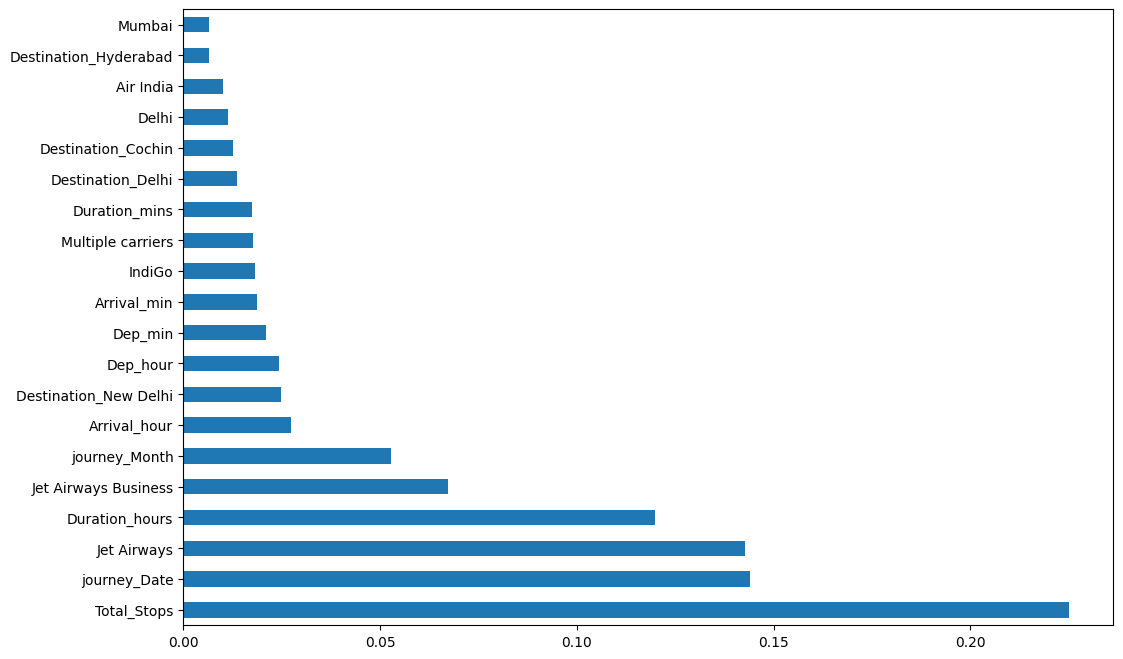

In [69]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [70]:
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deifne feature selection
fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(X,y)

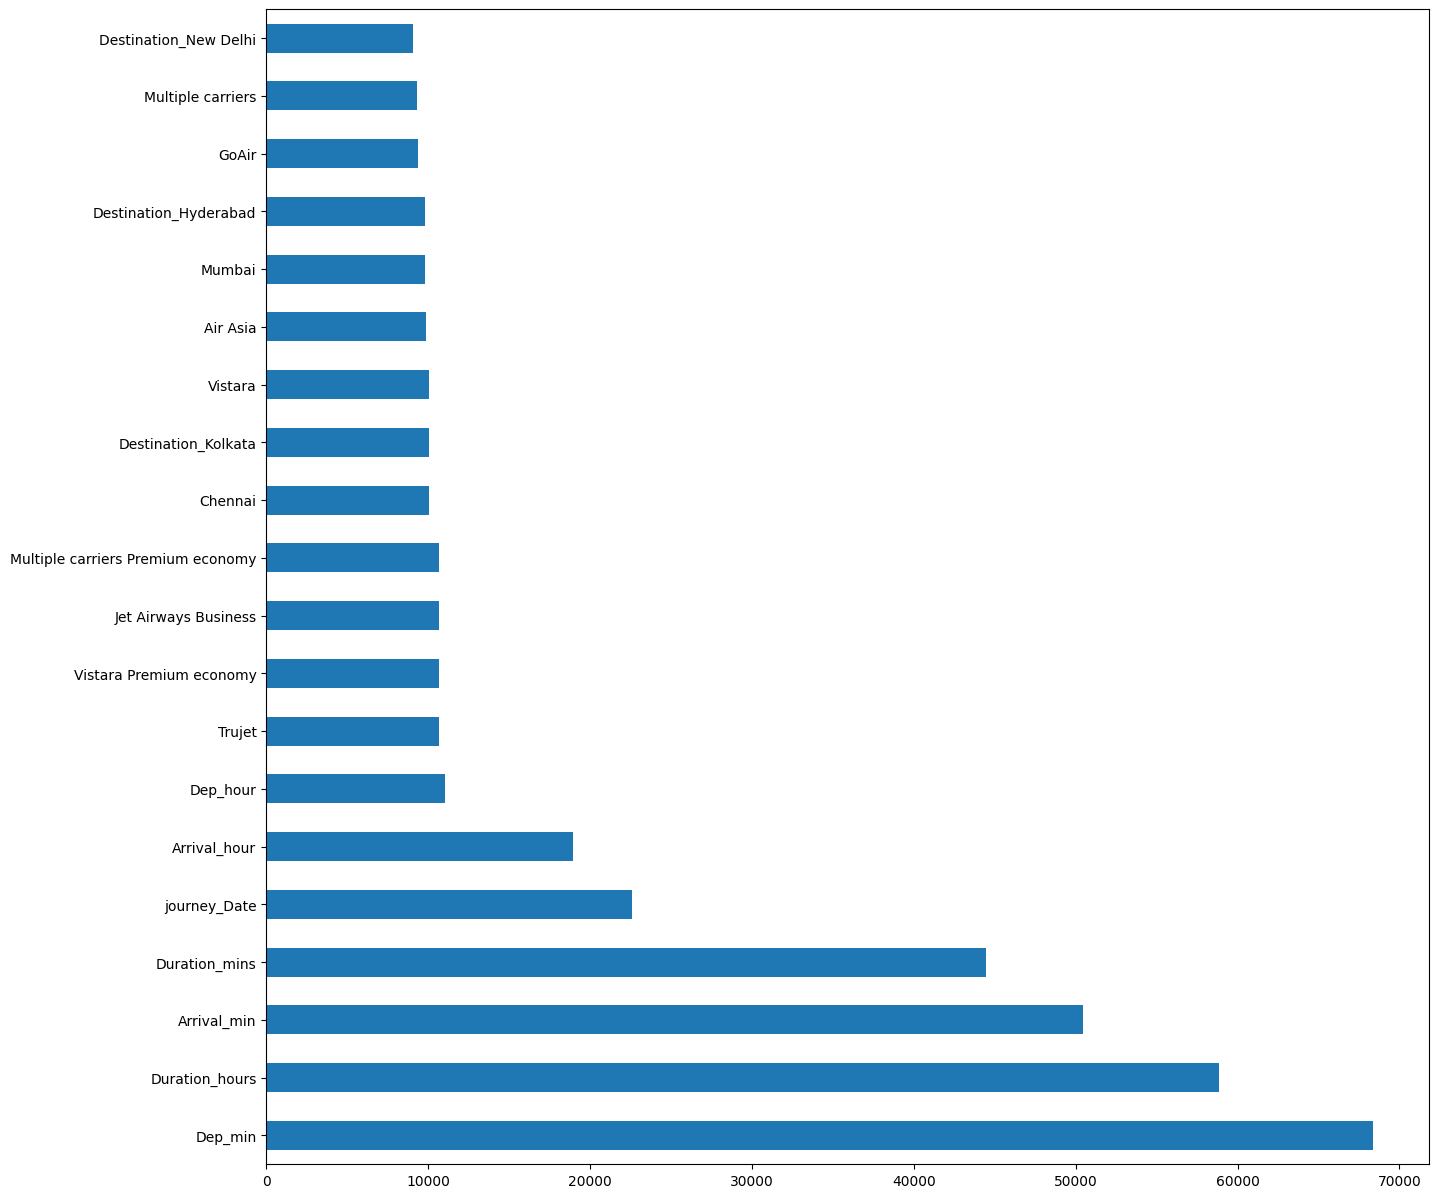

In [72]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [74]:
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
random_forest.score(X_test,y_test)

0.7973881730560166

In [76]:
random_forest.score(X_train,y_train)

0.9534898253431584

In [77]:
y_pred=random_forest.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

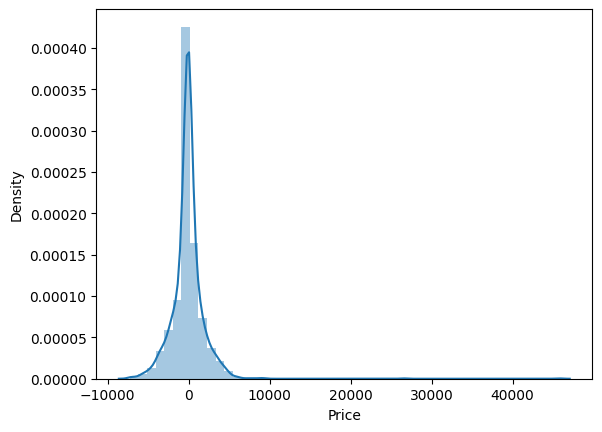

In [78]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-y_pred,kde=True)

In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.4772385908818
MSE: 4368727.62450749
RMSE: 2090.15014401059


Text(0, 0.5, 'prediction')

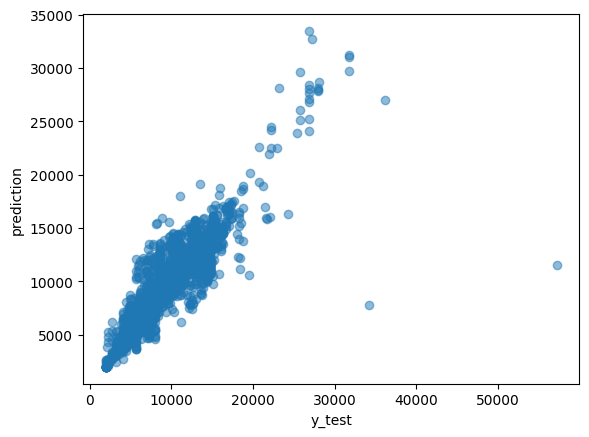

In [80]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')